<a href="https://colab.research.google.com/github/JuliaLorenzetti/data-science/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

Saving data without header information in a separate file

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data Science/CCD-absorbance.txt'

def remove_header():
  df = pd.read_csv(path, delimiter='\t', header=13) # the data is tab separated, thus delimiter \t
  df.info()
  df.to_string('CCD-data.txt')
remove_header()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Columns: 3650 entries, Unnamed: 0 to 780.0381
dtypes: float64(3648), int64(1), object(1)
memory usage: 9.9+ MB


Reducing the data resolution and measuring the running time

In [8]:
%%timeit -n 10 -r 5
df = pd.read_csv(path, delimiter='\t', header=13)
df_array= np.array(df)
mean_values_array= np.empty((355, 406), float)
for i in range(2, 3650, 9):  # data spans a range of 464 nm in 3658 columns which makes for roughly 8 columns per 1 nm
    df_subarray= df_array[0:355, i:(i+8)]
    new_df_subarray= df_subarray.mean(axis=1)
    np.insert(mean_values_array, i, new_df_subarray)
pd.DataFrame(mean_values_array).to_csv('mean-1nm.csv')

10 loops, best of 5: 914 ms per loop


CCD data vs time plot

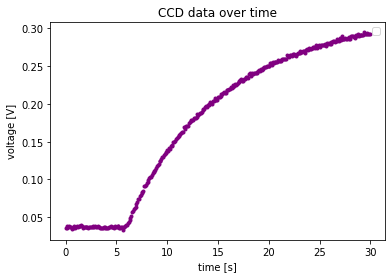

In [12]:
df = pd.read_csv(path, delimiter='\t', header=13)
time = df.iloc[:, 1]/1000
time_corr = time - 1540456324.789
diff_wl= -(df.iloc[:,1935]-df.iloc[:, 1778])  # difference btw 570 and 550 nm 

fig, ax = plot.subplots()
ax.set_title('CCD data over time')
ax.set_ylabel('voltage [V]')
ax.set_xlabel('time [s]')
ax.plot(time_corr, diff_wl, '.', color='purple')
plot.savefig('CCD-plot1.jpg')

In [ ]:
# extract column names in e.g. position 100
df.columns[100]

In [ ]:
# plotting time versus absorbance at a given wavelength
x = df.iloc[:,0]
y = df.iloc[:,1950]
plot.plot(x,y)

# wavelength difference
x = df.iloc[:,0]
y = -(df.iloc[:,1950]-df[:,1800])
plot.plot(x,y)

(array([0]),)